# EDA

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is used to see what the data can tell us beyond the formal modeling or hypothesis testing task.

**Index**

- [Environment](#Environment)


- [EDA](#EDA)
    - Variables Info
    - Visualization
        - Number of apps per Campus (total of all years)
        - Number of apps per Campus (taking into account the year of the bootcamp)
        - Number of apps per Stage / Campus
        - Number of apps with and without course (start date) / Campus
        - Number of apps per bootcamp course / Campus
        - Number of apps per bootcamp course / Year
        - Number of drop apps per reason / bootcamp course
        - Number of drop apps per reason / bootcamp year
        - Number of lost apps per stage / bootcamp course
        - Number of lost apps per stage / bootcamp campus
        - Number of apps per "how did you hear about us?" / campus
        - Number of apps per gender / campus
        - Number of apps per gender / bootcamp format
        - Number of apps per Medium / Bootcamp Format




## Environment

#### Import libraries

In [7]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Maths
import math
from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Interactive visualization
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

#### Import data

In [8]:
apps = pd.read_csv("apps_ih.csv", sep=";")

## EDA

### Variables Info

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40138 entries, 0 to 40137
Data columns (total 37 columns):
Opportunity ID                              40138 non-null object
Opportunity Name                            40055 non-null object
Has Courses                                 40138 non-null int64
Bootcamp Course                             36550 non-null object
Bootcamp Format                             36548 non-null object
Bootcamp Year                               36587 non-null float64
Bootcamp Start Date                         36587 non-null object
Campus                                      39852 non-null object
Campus - Timezone                           39852 non-null object
Created Date                                40138 non-null object
Close Date                                  40138 non-null object
Invoice Date                                2779 non-null object
Stage                                       40138 non-null object
Discount Amount (converted) Curren

### Visualization

Since the idea of this project it will be to predict sales / campus, we will try to visualize some numbers to have a grasp of what data we have.

#### Number of apps per Campus (total of all years)

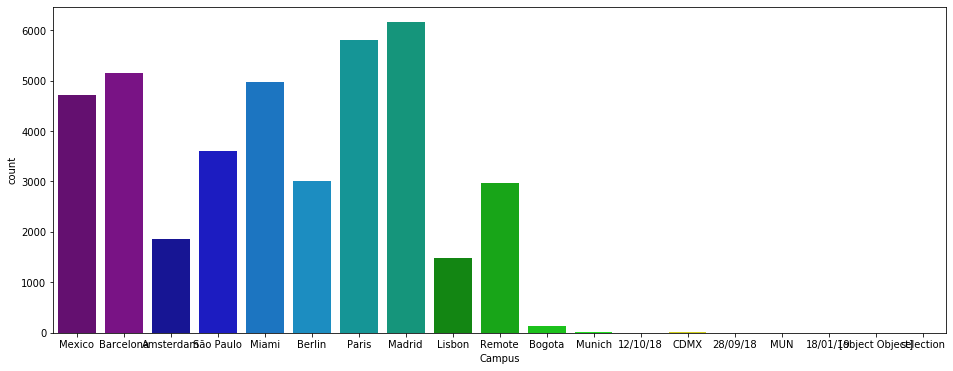

In [5]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(16,6))
g= sns.countplot(data=apps, x="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

Over all the years, we can see that Madrid and Paris are the 2 campus receiving more application, follow by Barecelona, Miami and Mexico. The campus with the lower apps is Lisbon. Campus Bogota, Munich (=MUN) are campus that were not open finaly so must be remove. And, obviously, 18/01/19 and selection are wrong campus names. 

#### Number of apps per Campus (taking into account the year of the bootcamp)

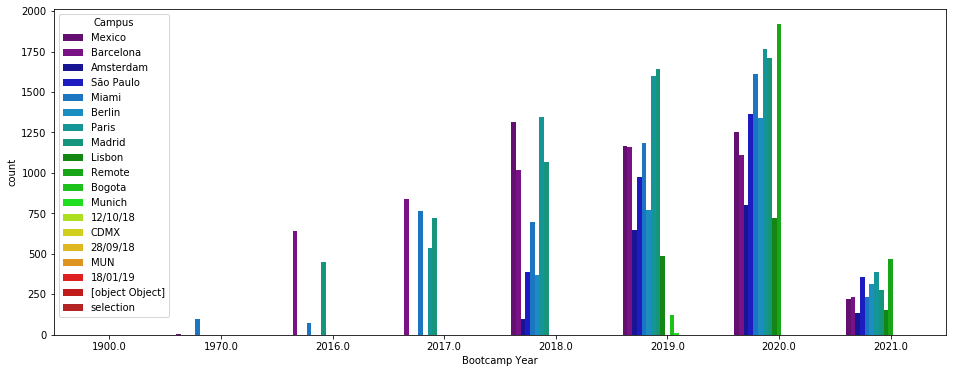

In [6]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(16,6))
g= sns.countplot(data=apps, x="Bootcamp Year", hue="Campus" ,palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

Knowing that the campus has open their doors in different years, although in our dataset we have data from 2016:
- Madrid & Miami open in 2013
- Barcelona opens in 2014
- Paris opens in 2017
- Mexic, Berlin, Amsterdam & Sao Paulo open in 2018
- Lisboa opens in 2019
- Remote opens in 2020

In this graph we can see that:
- During 2016, 2017 & 2018 Barcelona was the campus receiving more applications vs the other campus.
- During 2019 Madrid and Paris were receiving more applications vs the other campus.
- Druning 2020 Remote, París, Madrid and Miami receiving more applications vs the other campus.

_Note that application recieved = application with course date year not when they were introduced in the CRM system_

#### Number of apps per Stage / Campus

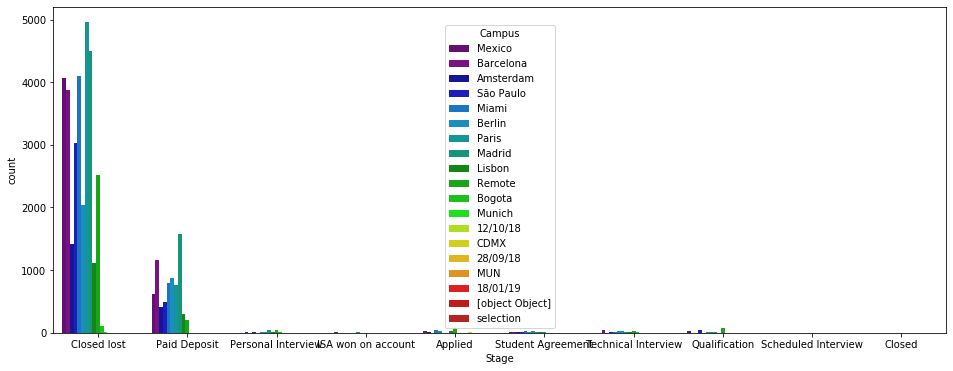

In [7]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(16,6))
g= sns.countplot(data=apps, x="Stage", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

#### Number of apps with and without course (start date) / Campus

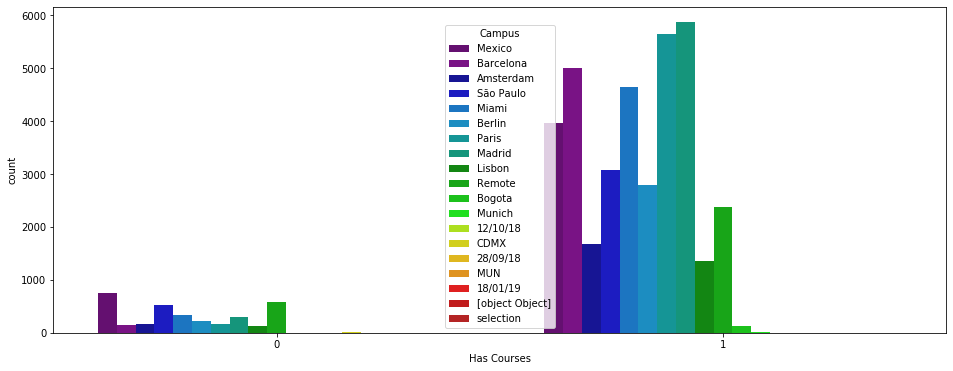

In [8]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(16,6))
g= sns.countplot(data=apps, x="Has Courses", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

In [9]:
apps["Has Courses"].value_counts()

1    36536
0     3602
Name: Has Courses, dtype: int64

We can see that 1% of the total application have no course, which mean no start date selected. And, Mexico is the one that has received more quanity.

#### Number of apps per bootcamp course / Campus

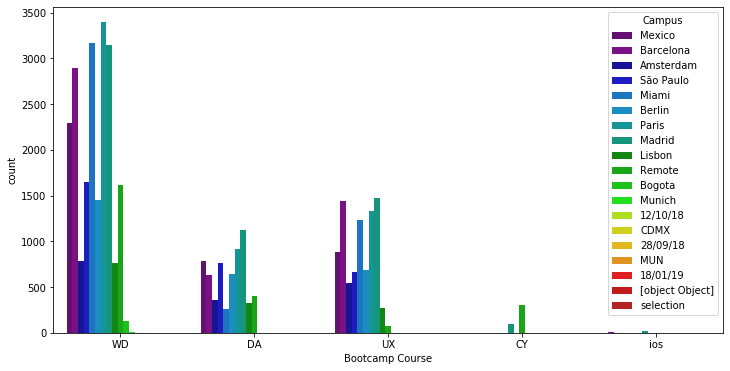

In [10]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(12,6))
g= sns.countplot(data=apps, x="Bootcamp Course", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

We can see that the course with more applications is Web Development. And, Barcelona, Madrid and Paris usually take the lead on receiving more applicatioin. This could mean that those campus have a bigger campus, for example.

#### Number of apps per bootcamp course / Year

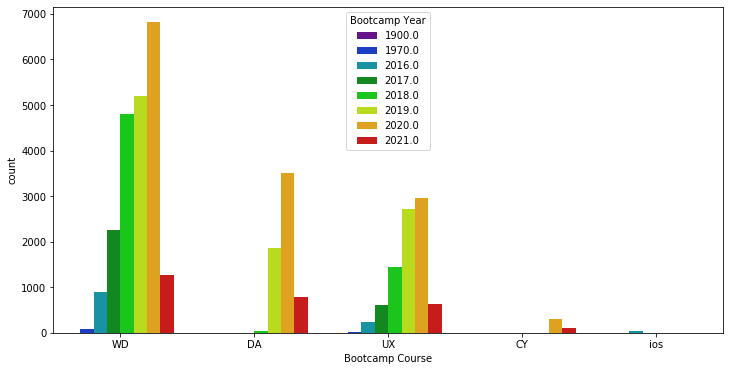

In [11]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(12,6))
g= sns.countplot(data=apps, x="Bootcamp Course", hue="Bootcamp Year", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels());

We can see that thoighut the years all campus had increised the number of application. Some of them had a fast boost.
We should remove year 1900 1970, as there is no sense. We'll check later what type of error it is.

#### Number of drop apps per reason  / bootcamp course

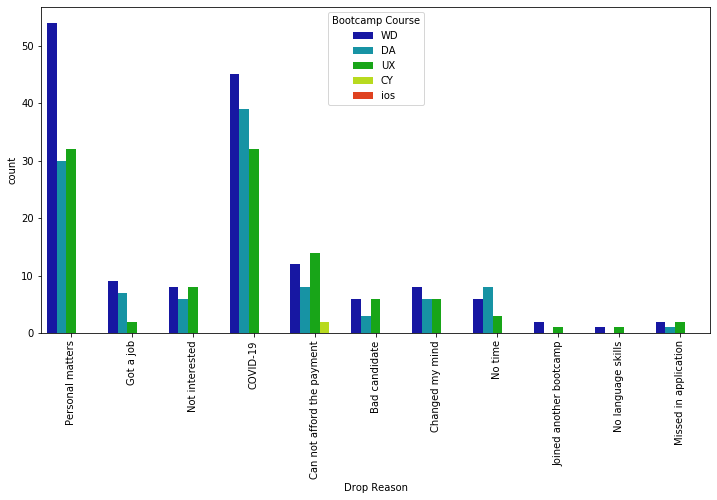

In [12]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(12,6))
g= sns.countplot(data=apps, x="Drop Reason", hue="Bootcamp Course", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

We can see that most of the drop reasons are Personal matters and Covid-19. 
We can highlight the following:
- UX bootcamps don't usually drop because they "got a job" and "no tiem", as much as the other bootcamps do.
- Main drop reason (might be the only one) for the CY bootcamps is "Can not afford the payment"
- Drop reaon "join another bootcamp" and "no language skills" are the lowest and not existing for DA and CY bootcamps

#### Number of drop apps per reason  / bootcamp format

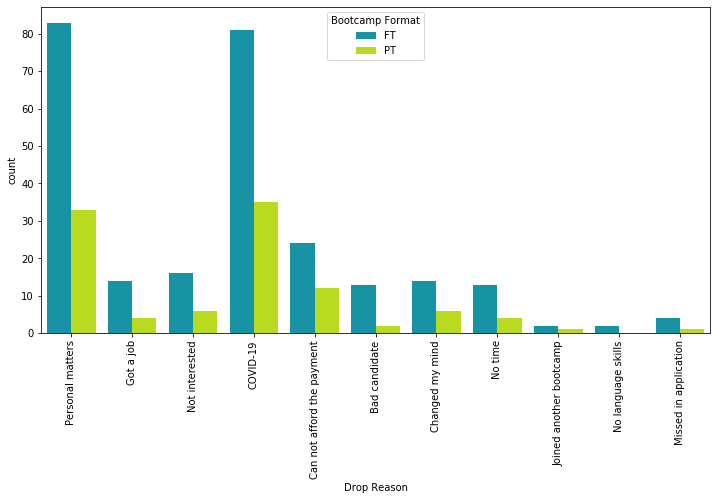

In [13]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(12,6))
g= sns.countplot(data=apps, x="Drop Reason", hue="Bootcamp Format", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [14]:
apps["Bootcamp Format"].value_counts()

FT    28062
PT     8486
Name: Bootcamp Format, dtype: int64

We can see that Full Time course tempt to drop more often. But, it is also becuase overall there are more full time course than part times as seen above.

#### Number of drop apps per reason  / bootcamp year

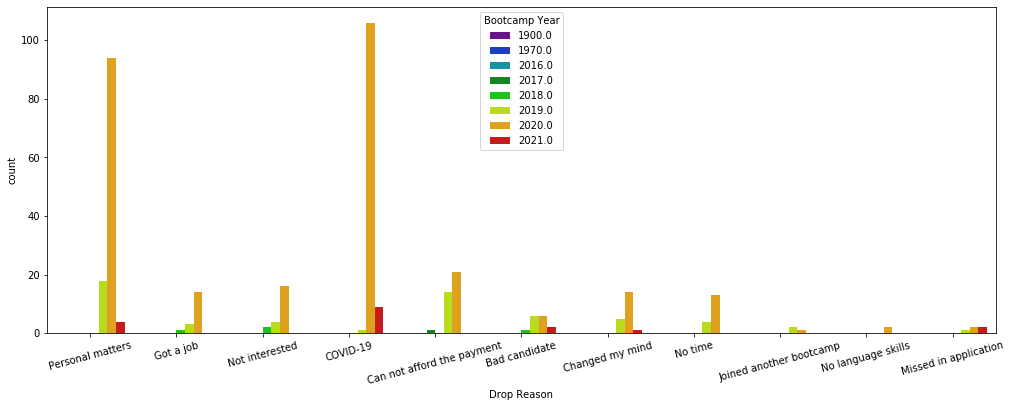

In [15]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="Drop Reason", hue="Bootcamp Year", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=15);

If we check the drop per year, we clearnly see that "COVID-19" drop correspond to 2020 and also most of the "Personal Matter" drops, that migh be related.

#### Number of lost apps per stage  / bootcamp course

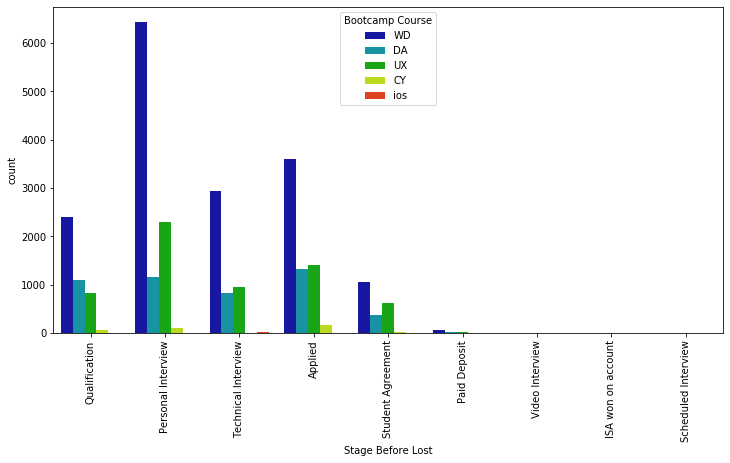

In [16]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(12,6))
g= sns.countplot(data=apps, x="Stage Before Lost", hue="Bootcamp Course", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

We can see that most of the students that drop during the admission process usually is in the personal interview.

#### Number of lost apps per stage  / campus

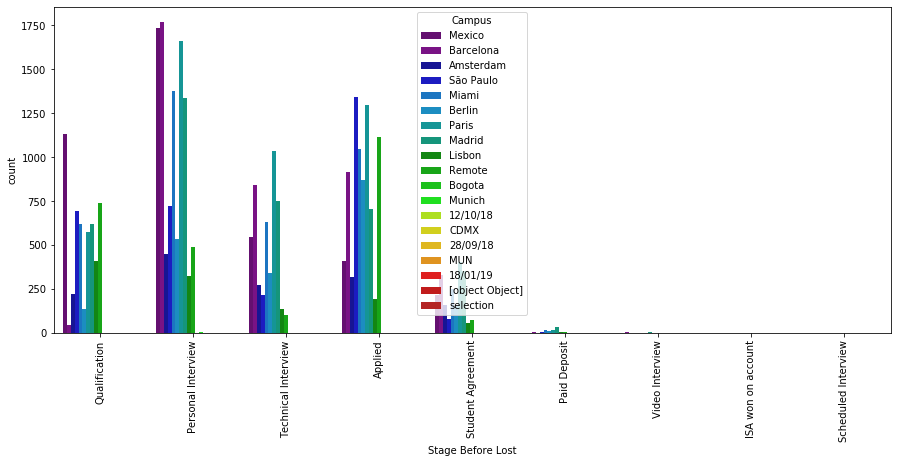

In [17]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(15,6))
g= sns.countplot(data=apps, x="Stage Before Lost", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Most of the campus follow the same pattern commented before excpet for Remote and SaoPaulo that have less drops during the "Personal Interview" and "Technical Interview" stage.

We should remove "Video" & "Schedule Interview" stages as they are not from the organic application process but from the scholarship application process. 

#### Number of lost apps per reason  / campus

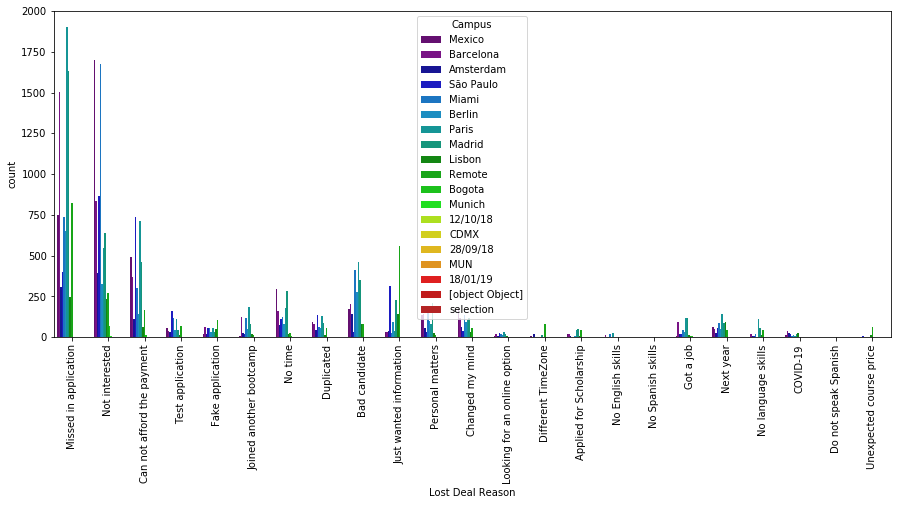

In [19]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(15,6))
g= sns.countplot(data=apps, x="Lost Deal Reason", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Most os our applicants drop during our process because they've disappear (="Missed in application") and becuase they were no longer interested (=Not Interested). The other main reason that follow is "Can not afford the payment".

We should remove the test application - fake applicatinons - dupplicated (?)

#### Number of apps per "how did you hear about us?"  / campus

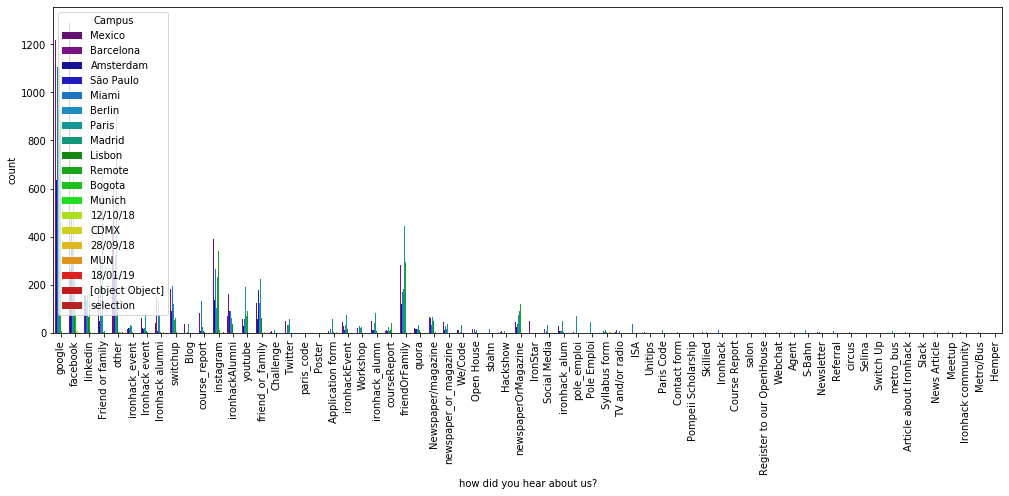

In [20]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="how did you hear about us?", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Mainly applicants hear about us thought Google, Friends and family and social media (mainly facebook).

#### Number of apps per gender  / campus

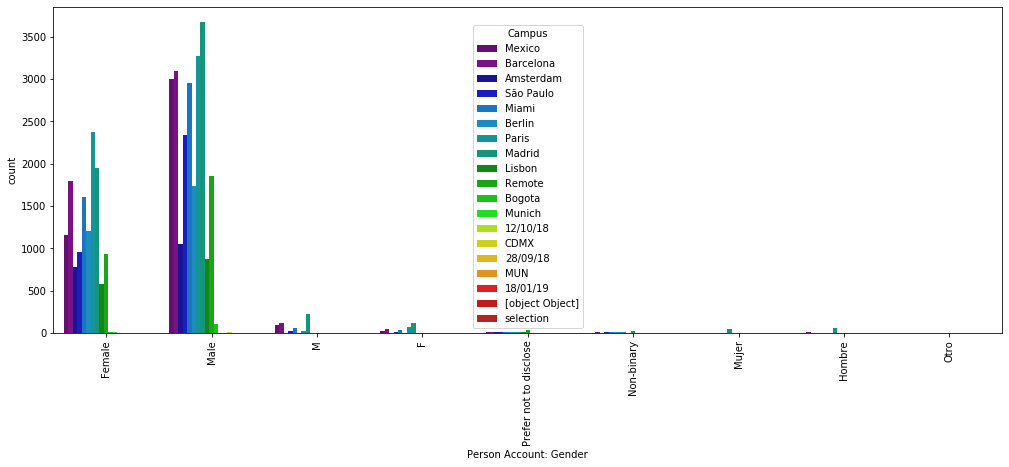

In [21]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="Person Account: Gender", hue="Campus", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Although Male is leading, in some campus there is a quite balance course, for example in Lisboa and Amsterdam.

#### Number of apps per gender  / Bootcamp format

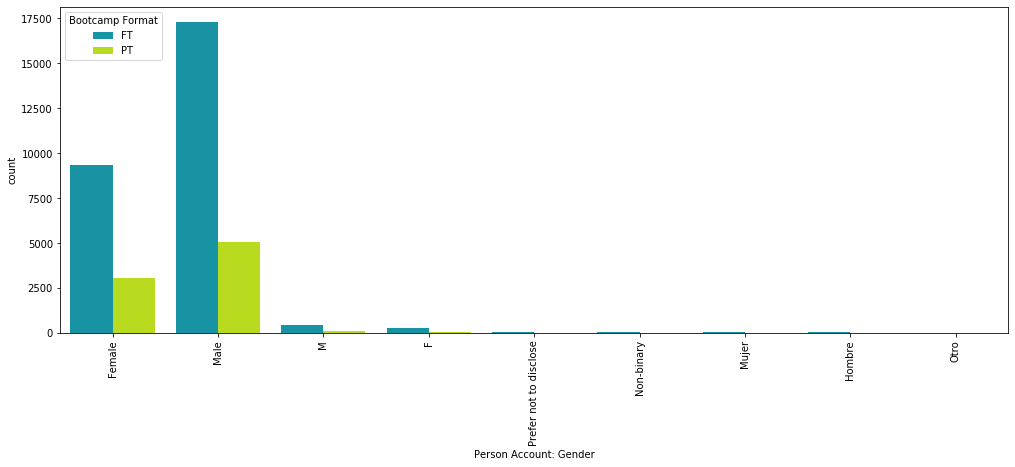

In [22]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="Person Account: Gender", hue="Bootcamp Format", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Part time courses have a prettty balance gender class, compared to the full time where Males are taking the lead.

#### Number of apps per Medium / Bootcamp Format

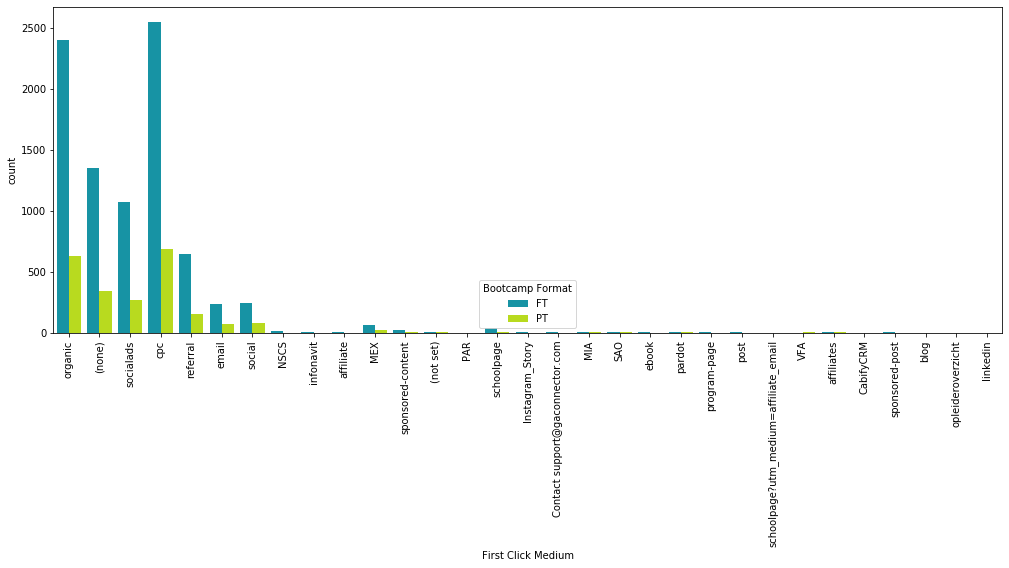

In [23]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="First Click Medium", hue="Bootcamp Format", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

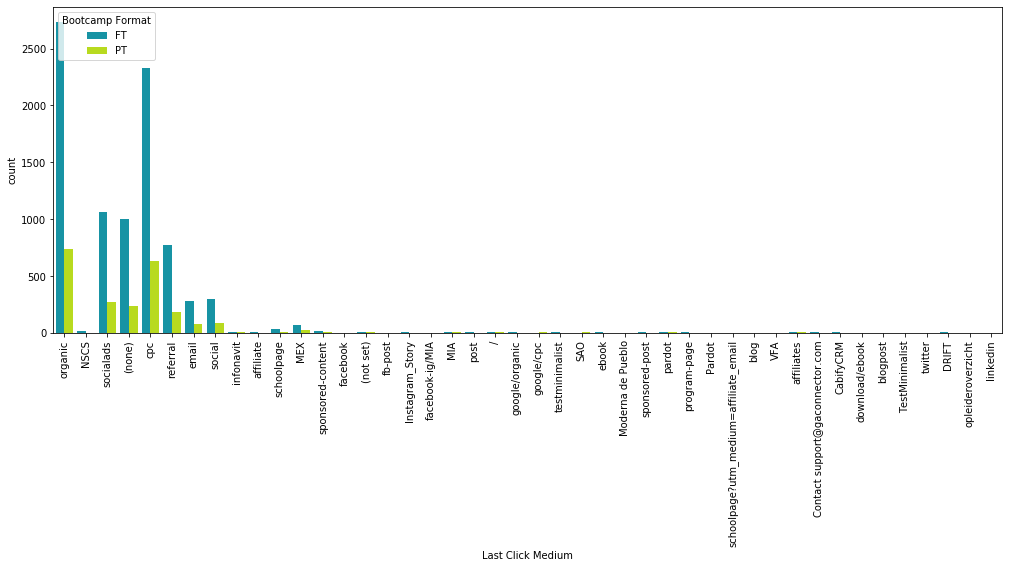

In [24]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="Last Click Medium", hue="Bootcamp Format", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

We can see that the Medium most effective is Organic, cpc, socialads and referral - for both First and last click.

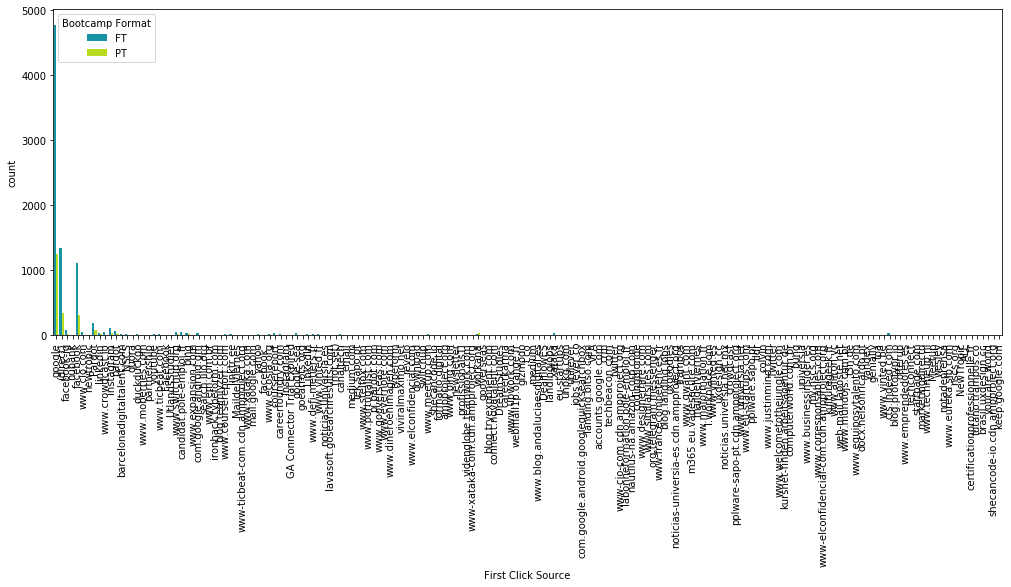

In [25]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="First Click Source", hue="Bootcamp Format", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [26]:
apps["First Click Source"].value_counts()[:5]

google       6848
(direct)     1964
facebook     1704
Pardot        281
instagram     176
Name: First Click Source, dtype: int64

In [27]:
apps["Last Click Source"].value_counts()[:5]

google       6963
facebook     1754
(direct)     1414
Pardot        344
instagram     184
Name: Last Click Source, dtype: int64

We can see that the most effective source is google, for both first and last click.

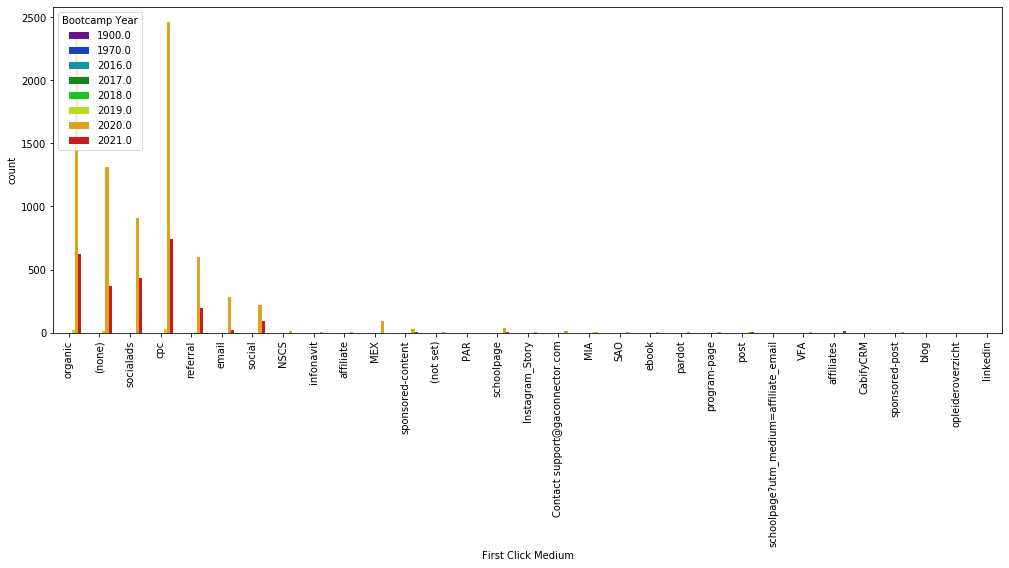

In [28]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="First Click Medium", hue="Bootcamp Year", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

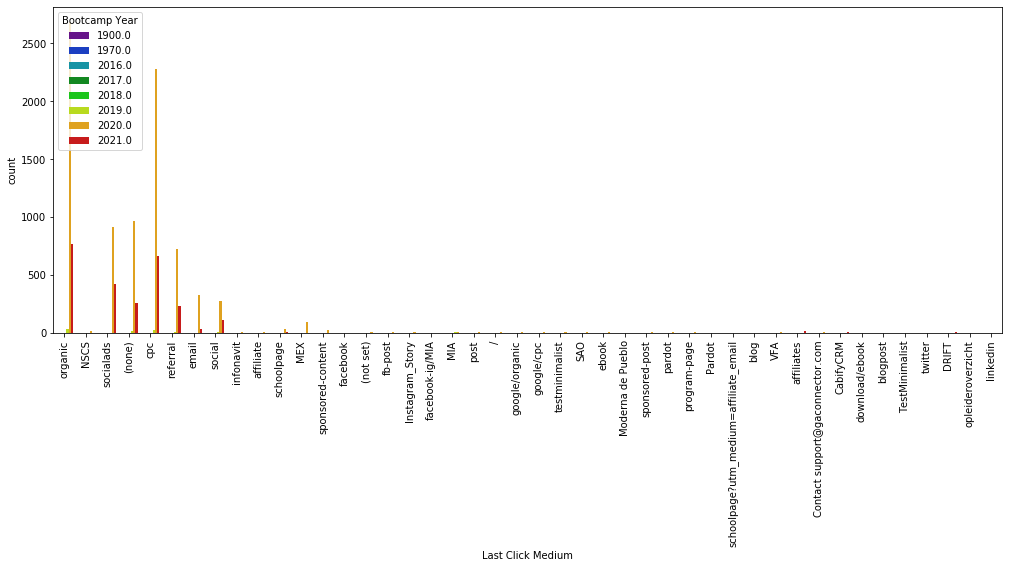

In [29]:
ig_dims = (12, 6)
fig, ax = plt.subplots(figsize=(17,6))
g= sns.countplot(data=apps, x="Last Click Medium", hue="Bootcamp Year", palette="nipy_spectral", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Last but not least, we can see that data from markting team was only collected from 2019 and on.